In [1]:
import pandas as pd
import numpy as np
import keras
import talos as ta

Using TensorFlow backend.


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from talos.utils import metrics

In [4]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD

In [5]:
from keras import backend as K

# Load the dataset 
were using the [Mammography Mass](http://archive.ics.uci.edu/ml/datasets/mammographic+mass) dataset from UCI Machine Learning Repository

In [6]:
df = pd.read_csv('~/DATA/mammographic_masses.data', na_values='?', names=['BI-RADS', 'Age', 'Shape', 'Margin', 'Density', 'Severity'])

In [7]:
df.head()

,BI-RADS,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1


In [8]:
df.shape

(961, 6)

In [9]:
df.isna().sum()

BI-RADS      2
Age          5
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64

According the the data description the 'BI-RADS' column is not predictive. We will drop this column along with any rows with missing values

In [10]:
df = df.drop('BI-RADS', axis=1)
df.head()

,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1


In [11]:
no_nan_df = df.dropna()
no_nan_df.shape

(831, 5)

In [12]:
no_nan_df.head()

,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
8,57.0,1.0,5.0,3.0,1
10,76.0,1.0,4.0,3.0,1


# Split data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(no_nan_df.iloc[:,:4], no_nan_df.iloc[:,4], train_size=0.6)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, train_size=0.5)

In [14]:
X_val.head()

,Age,Shape,Margin,Density
419,78.0,4.0,4.0,3.0
300,49.0,4.0,5.0,3.0
211,69.0,3.0,1.0,3.0
792,41.0,4.0,3.0,2.0
347,78.0,4.0,4.0,3.0


In [15]:
y_train.head()

269    1
481    0
34     0
465    0
483    0
Name: Severity, dtype: int64

# Scale the data

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

# Set up the keras model as Baseline (without Talos)

In [17]:
K.clear_session()
model = Sequential()
model.add(Dense(4, activation='relu', input_dim=4))
model.add(Dense(4, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(
    loss='binary_crossentropy',
    optimizer='sgd',
    metrics=['accuracy', metrics.precision, metrics.recall, metrics.f1score]
)

Instructions for updating:
Colocations handled automatically by placer.


In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


# Train your model

In [19]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=100
                   )

Instructions for updating:
Use tf.cast instead.
Train on 498 samples, validate on 166 samples
Epoch 1/100
498/498 [==============================] - 0s 660us/step - loss: 0.7429 - acc: 0.4458 - precision: 0.4598 - recall: 0.8619 - f1score: 0.5949 - val_loss: 0.7140 - val_acc: 0.5241 - val_precision: 0.5154 - val_recall: 0.8636 - val_f1score: 0.6428
Epoch 2/100
498/498 [==============================] - 0s 153us/step - loss: 0.7270 - acc: 0.4378 - precision: 0.4564 - recall: 0.8387 - f1score: 0.5856 - val_loss: 0.7030 - val_acc: 0.5120 - val_precision: 0.5076 - val_recall: 0.8361 - val_f1score: 0.6294
Epoch 3/100
498/498 [==============================] - 0s 188us/step - loss: 0.7136 - acc: 0.4297 - precision: 0.4491 - recall: 0.8321 - f1score: 0.5794 - val_loss: 0.6936 - val_acc: 0.5120 - val_precision: 0.5076 - val_recall: 0.8361 - val_f1score: 0.6294
Epoch 4/100
498/498 [==============================] - 0s 202us/step - loss: 0.7020 - acc: 0.4317 - precision: 0.4534 - recall: 0.8272 

Epoch 32/100
498/498 [==============================] - 0s 191us/step - loss: 0.4859 - acc: 0.8233 - precision: 0.7818 - recall: 0.8516 - f1score: 0.8126 - val_loss: 0.5157 - val_acc: 0.7590 - val_precision: 0.7288 - val_recall: 0.8320 - val_f1score: 0.7714
Epoch 33/100
498/498 [==============================] - 0s 53us/step - loss: 0.4814 - acc: 0.8233 - precision: 0.7847 - recall: 0.8510 - f1score: 0.8135 - val_loss: 0.5122 - val_acc: 0.7590 - val_precision: 0.7288 - val_recall: 0.8320 - val_f1score: 0.7714
Epoch 34/100
498/498 [==============================] - 0s 189us/step - loss: 0.4773 - acc: 0.8233 - precision: 0.7912 - recall: 0.8542 - f1score: 0.8145 - val_loss: 0.5091 - val_acc: 0.7590 - val_precision: 0.7288 - val_recall: 0.8320 - val_f1score: 0.7714
Epoch 35/100
498/498 [==============================] - 0s 195us/step - loss: 0.4737 - acc: 0.8233 - precision: 0.7898 - recall: 0.8602 - f1score: 0.8215 - val_loss: 0.5063 - val_acc: 0.7590 - val_precision: 0.7288 - val_recall

Epoch 64/100
498/498 [==============================] - 0s 197us/step - loss: 0.4408 - acc: 0.8213 - precision: 0.7865 - recall: 0.8621 - f1score: 0.8190 - val_loss: 0.4821 - val_acc: 0.7651 - val_precision: 0.7305 - val_recall: 0.8559 - val_f1score: 0.7817
Epoch 65/100
498/498 [==============================] - 0s 200us/step - loss: 0.4406 - acc: 0.8213 - precision: 0.7942 - recall: 0.8674 - f1score: 0.8238 - val_loss: 0.4818 - val_acc: 0.7651 - val_precision: 0.7305 - val_recall: 0.8559 - val_f1score: 0.7817
Epoch 66/100
498/498 [==============================] - 0s 202us/step - loss: 0.4404 - acc: 0.8213 - precision: 0.7769 - recall: 0.8544 - f1score: 0.8101 - val_loss: 0.4817 - val_acc: 0.7651 - val_precision: 0.7305 - val_recall: 0.8559 - val_f1score: 0.7817
Epoch 67/100
498/498 [==============================] - 0s 189us/step - loss: 0.4402 - acc: 0.8213 - precision: 0.7791 - recall: 0.8602 - f1score: 0.8146 - val_loss: 0.4816 - val_acc: 0.7651 - val_precision: 0.7305 - val_recal

Epoch 96/100
498/498 [==============================] - 0s 196us/step - loss: 0.4363 - acc: 0.8213 - precision: 0.7868 - recall: 0.8572 - f1score: 0.8178 - val_loss: 0.4767 - val_acc: 0.7711 - val_precision: 0.7358 - val_recall: 0.8559 - val_f1score: 0.7857
Epoch 97/100
498/498 [==============================] - 0s 189us/step - loss: 0.4363 - acc: 0.8213 - precision: 0.7828 - recall: 0.8572 - f1score: 0.8161 - val_loss: 0.4765 - val_acc: 0.7711 - val_precision: 0.7358 - val_recall: 0.8559 - val_f1score: 0.7857
Epoch 98/100
498/498 [==============================] - 0s 192us/step - loss: 0.4363 - acc: 0.8213 - precision: 0.7860 - recall: 0.8691 - f1score: 0.8202 - val_loss: 0.4764 - val_acc: 0.7711 - val_precision: 0.7358 - val_recall: 0.8559 - val_f1score: 0.7857
Epoch 99/100
498/498 [==============================] - 0s 194us/step - loss: 0.4362 - acc: 0.8213 - precision: 0.7818 - recall: 0.8602 - f1score: 0.8138 - val_loss: 0.4763 - val_acc: 0.7711 - val_precision: 0.7358 - val_recal

# Ploting the training curves

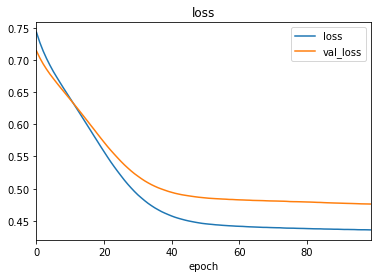

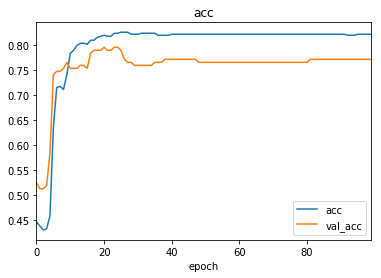

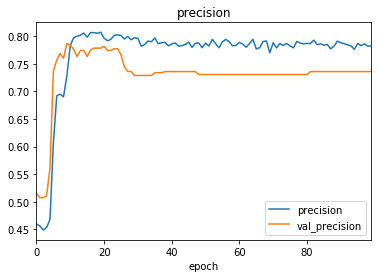

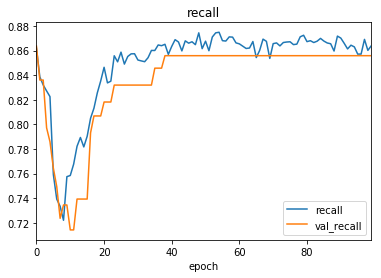

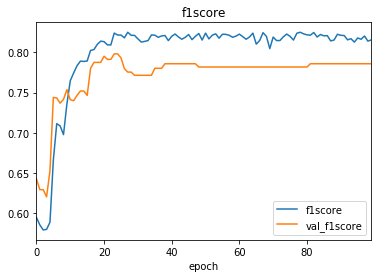

In [20]:
h = pd.DataFrame(data=history.history)
for col in ['loss', 'acc', 'precision', 'recall', 'f1score']:
    ax = h[[col, 'val_'+col]].plot()
    _ = ax.set_xlabel('epoch')
    _ = ax.set_title(col)

In [21]:
print("""test loss: %.2f
test accuracy: %.2f
test precision: %.2f
test recall: %.2f
test f1score: %.2f
""" % tuple(model.evaluate(X_test, y_test)))

167/167 [==============================] - 0s 33us/step
test loss: 0.49
test accuracy: 0.78
test precision: 0.72
test recall: 0.86
test f1score: 0.78



# [Talos](https://autonomio.github.io/talos) for hyperparameter optimization
[Here](https://towardsdatascience.com/hyperparameter-optimization-with-keras-b82e6364ca53) is a really good article that goes into more detail 

There are 6 main components in a Talos workflow
* __Scan__ - Search a hyperparameter space
* __Analyze__ - Analyze the results of a search
* __Evaluate__ - Evaluate the performance of a model
* Predict - Make a prediction
* Deploy - Package the best performing model
* Restore - Restore a packaged model

We will focus on Scan, Analyze, and Evaluate

# Scan
Scan expects a few arguments. The main arguments are
1. The data to train on
2. A parameter space to search
3. A function that takes in a set of parameters and returns a trained model

# Defining your hyperparameter space
Talos has 2 ways to define values in the parameter dicionary.
* list - a list defines a set of discrete values to select from
* tuple - a tuple defines a range of values to select from (start, stop, nsteps)

In [22]:
params = {
    'L1_size': (2,8,6),
    'L1_activation': ['relu', 'elu'],
    'L2_size': (2,8,6),
    'L2_activation': ['relu', 'elu'],
    'learning_rate': list(np.logspace(-1, -6, 10))
}

# Defining your keras model
Talos expects a function that takes in
* training data (X, y)
* validation data (X_val, y_val)
* a parameter dictionary

We then link the value in the dictionary to the parameters in our model definition

The function must return the __output of the fit function (history)__ and the __model__ itself

In [23]:
def mammo_model(X, y, X_val, y_val, p):
    model = Sequential()
    model.add(Dense(p['L1_size'], activation=p['L1_activation'], input_dim=4))
    model.add(Dense(p['L2_size'], activation=p['L2_activation']))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        loss='binary_crossentropy',
        optimizer=SGD(lr=p['learning_rate']),
        metrics=['accuracy', metrics.precision, metrics.recall, metrics.f1score]
    )
    
    history = model.fit(X, y,
                    validation_data=(X_val, y_val),
                    epochs=100,
                    verbose=0
                )
    
    return history, model

# Execute Scan DO NOT RUN

In [24]:
h = ta.Scan(
    X_train,
    y_train,
    params,
    mammo_model,
    'Mammography',
    x_val=X_val,
    y_val=y_val,
    fraction_limit=0.1
)

  2%|▏         | 3/144 [00:23<18:33,  7.89s/it]

KeyboardInterrupt: 

# Viewing your results

In [ ]:
bestmodel = h.best_model(metric='val_f1score')

In [ ]:
bestmodel.summary()

In [ ]:
h.data.sort_values('val_f1score', ascending=False)

# Analyze
We can use analyze to see which hyperparameters have an effect on the performance

In [ ]:
a = ta.Analyze(h)
a.plot_corr('val_f1score', ['loss', 'acc', 'precision', 'recall', 'f1score',
                            'val_loss', 'val_acc', 'val_precision', 'val_recall'])

In [ ]:
a.plot_hist('L2_size')

# Evaluate
Evaluate gives us the F1 score of the model evaluated on our test data. It split the data into 5 groups returns the 5 F1 scores. It also prints out the mean and standard deviation.

In [ ]:
e = ta.Evaluate(h)
e.evaluate(np.array(X_test), np.array(y_test), 'binary', 'val_f1score', print_out=True)